In [1]:
import torch

c:\Users\Wen2Tee5\Desktop\Postgraduate\torchPlayGround\torchEnv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
corpus = [
    """
    When forty winters shall besiege thy brow,
    And dig deep trenches in thy beauty's field,
    Thy youth's proud livery so gazed on now,
    Will be a totter'd weed of small worth held:
    Then being asked, where all thy beauty lies,
    Where all the treasure of thy lusty days;
    To say, within thine own deep sunken eyes,
    Were an all-eating shame, and thriftless praise.
    How much more praise deserv'd thy beauty's use,
    If thou couldst answer 'This fair child of mine
    Shall sum my count, and make my old excuse,'
    Proving his beauty by succession thine!
    This were to be new made when thou art old,
    And see thy blood warm when thou feel'st it cold.
    """,
]

In [3]:
def tokenize_corpus(corpus):
    tokens = [x.split() for x in corpus]
    return tokens

In [4]:
sentences = tokenize_corpus(corpus=corpus)

In [5]:
print(sentences)

[['When', 'forty', 'winters', 'shall', 'besiege', 'thy', 'brow,', 'And', 'dig', 'deep', 'trenches', 'in', 'thy', "beauty's", 'field,', 'Thy', "youth's", 'proud', 'livery', 'so', 'gazed', 'on', 'now,', 'Will', 'be', 'a', "totter'd", 'weed', 'of', 'small', 'worth', 'held:', 'Then', 'being', 'asked,', 'where', 'all', 'thy', 'beauty', 'lies,', 'Where', 'all', 'the', 'treasure', 'of', 'thy', 'lusty', 'days;', 'To', 'say,', 'within', 'thine', 'own', 'deep', 'sunken', 'eyes,', 'Were', 'an', 'all-eating', 'shame,', 'and', 'thriftless', 'praise.', 'How', 'much', 'more', 'praise', "deserv'd", 'thy', "beauty's", 'use,', 'If', 'thou', 'couldst', 'answer', "'This", 'fair', 'child', 'of', 'mine', 'Shall', 'sum', 'my', 'count,', 'and', 'make', 'my', 'old', "excuse,'", 'Proving', 'his', 'beauty', 'by', 'succession', 'thine!', 'This', 'were', 'to', 'be', 'new', 'made', 'when', 'thou', 'art', 'old,', 'And', 'see', 'thy', 'blood', 'warm', 'when', 'thou', "feel'st", 'it', 'cold.']]


In [6]:
voc = []

In [7]:
for sentence in sentences:
     for word in sentence:
        if word not in voc:
            voc.append(word)

In [8]:
print(voc)

['When', 'forty', 'winters', 'shall', 'besiege', 'thy', 'brow,', 'And', 'dig', 'deep', 'trenches', 'in', "beauty's", 'field,', 'Thy', "youth's", 'proud', 'livery', 'so', 'gazed', 'on', 'now,', 'Will', 'be', 'a', "totter'd", 'weed', 'of', 'small', 'worth', 'held:', 'Then', 'being', 'asked,', 'where', 'all', 'beauty', 'lies,', 'Where', 'the', 'treasure', 'lusty', 'days;', 'To', 'say,', 'within', 'thine', 'own', 'sunken', 'eyes,', 'Were', 'an', 'all-eating', 'shame,', 'and', 'thriftless', 'praise.', 'How', 'much', 'more', 'praise', "deserv'd", 'use,', 'If', 'thou', 'couldst', 'answer', "'This", 'fair', 'child', 'mine', 'Shall', 'sum', 'my', 'count,', 'make', 'old', "excuse,'", 'Proving', 'his', 'by', 'succession', 'thine!', 'This', 'were', 'to', 'new', 'made', 'when', 'art', 'old,', 'see', 'blood', 'warm', "feel'st", 'it', 'cold.']


In [9]:
word2idx = {w:idx for (idx, w) in enumerate(voc)}
inx2word = {idx:w for (idx, w) in enumerate(voc)}

In [10]:
# N-gram
CONTEXT_SIZE = 2
idx_pair = []
for sentence in sentences:
    for i in range(CONTEXT_SIZE, len(sentence)):
        context = [sentence[i - j - 1] for j in range(CONTEXT_SIZE)]
        target = sentence[i]
        idx_pair.append((context, target))

In [11]:
idx_pair[0]

(['forty', 'When'], 'winters')

In [12]:
class embedding(torch.nn.Module):

    def __init__(self, vocab_size, embedding_dim) -> None:
        super(embedding, self).__init__()
        self.tableW = torch.nn.Parameter(torch.randn((vocab_size, embedding_dim), requires_grad=True))
        self.embedding_dim = embedding_dim

    def forward(self, idx):
        return self.tableW[idx]



class NGramLanguageModeler(torch.nn.Module):

    def __init__(self, vocab_size, embedding_dim, context_size) -> None:
        super(NGramLanguageModeler, self).__init__()
        self.embeddings = embedding(vocab_size, embedding_dim)
        self.linear1 = torch.nn.Linear(context_size * embedding_dim, 128)
        self.linear2 = torch.nn.Linear(128, vocab_size)

    def forward(self, x):
        x = self.embeddings(x).view((1, -1)) # 這邊的想法是concat兩個tensor的向量後透過線性轉換預測下一個字
        x = torch.nn.functional.relu(self.linear1(x))
        x = self.linear2(x)
        x = torch.nn.functional.log_softmax(x, dim=1)
        return x

In [13]:
losses = []
epochs = []
loss_function = torch.nn.NLLLoss()
model = NGramLanguageModeler(len(voc), 30, CONTEXT_SIZE)
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [14]:
model.embeddings(torch.tensor(data=[1,2,3]))

tensor([[-0.2700,  0.5972, -0.6108,  0.9323,  0.8896,  0.2719,  0.7058, -0.6046,
         -0.7859, -1.2425,  0.3054, -0.4626, -0.0135, -0.3036, -0.4620,  0.9767,
          0.3491, -1.3907, -0.1372, -0.5808, -0.8461, -0.5134, -1.3109, -0.1277,
          0.9833,  0.9380, -2.8932,  1.1367, -0.6187,  0.8592],
        [ 1.7708,  0.8274, -0.0667,  0.5108,  0.7075,  0.6657,  0.0721,  1.0638,
         -0.4197, -1.6243, -0.7683, -1.8323, -1.8865, -0.7758, -0.2182, -1.6932,
         -0.4548,  0.6792,  0.2086, -0.3762, -0.3662, -1.8642, -0.4929, -0.0629,
          0.8191,  1.0715, -0.0226,  1.2215, -0.4643,  0.9207],
        [-1.1051,  1.8928,  3.6464, -1.0805,  0.4527,  0.9018, -0.3676, -0.0115,
          0.3983,  0.1063, -0.3685,  0.6237,  0.4366, -2.3076, -0.3626, -0.2700,
          0.1446,  1.0993, -0.7414,  1.8486,  0.2921,  2.1642,  1.6148,  0.0735,
         -0.2000,  1.0803,  0.4040,  2.0073, -1.2858,  0.1872]],
       grad_fn=<IndexBackward0>)

In [15]:
len(idx_pair)

113

In [16]:
for epoch in range(20):
    for context, target in idx_pair:
        context_idxs = torch.tensor([word2idx[w] for w in context], dtype=torch.long)
        model.zero_grad()
        log_probs = model(context_idxs)
        loss = loss_function(log_probs, torch.tensor([word2idx[target]], dtype=torch.long))
        loss.backward()
        optimizer.step()
        losses.append(loss.item()) 
    

In [17]:
import matplotlib.pyplot as plt

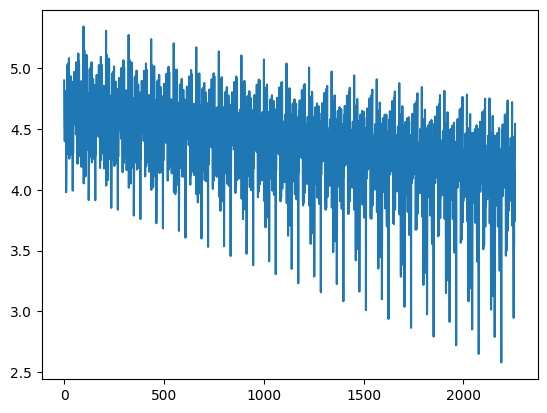

In [18]:
plt.plot(losses)
plt.show()